# Final project : Analysis of historical gas emissions for different countries in the world
---
Group: Frankie Ma, Sumeng Xu, Shuyao Li, David Lin

The dataset of greenhouse gas (GHG) emissions data sourced from Climate Watch. It lists several countries along with their total annual emissions measured in metric tons of CO2 equivalent (MtCO2e) over a range of years, which is used to express the amount of greenhouse gases in terms of the equivalent amount of carbon dioxide that would have the same global warming potential (GWP). The country Guyana has a missing value in 1990. The data provides historical emissions trends, with columns for each year from 1990 to 2019. This information could be useful to analyze changes in emissions over time, compare emissions among countries, or evaluate the effectiveness of environmental policies.

## Part I

### Has there been an overall increase in global greenhouse gas emissions since 1900?
The total greenhouse gas emissions show a consistent upward pattern since 1900, it indicates a sustained increase in emissions over the years. This trend was discerned through the computation of annual mean gas emissions across 194 countries, visually represented through a histogram for clearer observation.

### Over the years, has the variability of greenhouse gas emissions increased, decreased, or remained relatively constant?
A graph was constructed to further illustrate the standard deviation of mean greenhouse gas emissions across multiple years. The analysis revealed a consistent increase in variability each year, aligning with the observed pattern in the mean emissions. This correlation is logical, as fluctuations in the standard deviation mirror the corresponding trends in the mean values.

### What is the general trend in terms of the seven continents ' greenhouse gas emissions?
We are interested in how the seven continents plays a role in the emission of MtCO₂e, so we grouped the data into continents and calculated the mean. The resulting line chart depicts a span of five years, from 1990 to 2019. Observing the graph, North America stands out for having the highest overall emissions. Over time, Asia demonstrates a  increasing trend in emissions. Conversely, South America and Europe show decreasing trends. Both Oceania and Africa exhibit the lowest emissions with relatively consistent trends.

### Any improvement across 1990-2019, which continent has the greatest improvement over time and why?
With the calculation of the difference between 2019 and 1990, the chart presented the overall improvement between continents. Europe showcased the most substantial reduction, marking a difference of -93.585312. We did a further analysis with why Eruope had this high improvement. Based on our result, we search online about EU climate policy. The EU is a key player in UN climate change talks and has signed the Paris agreement. Under the Paris agreement, the EU committed in 2015 to cutting greenhouse gas emissions in the EU by at least 40% below 1990 levels by 2030. The decreasing trend proved that their ambitious commitment is effecive. 

Overall, our analysis underscores the varying emission trends across continents and highlights the feature of the trend between 1990 to 2019, aligning with Europe's ambitious climate commitments under the Paris agreement.

## PCA and K-means Clustering

Understanding PCA consists of choosing a small subset of components, so our basic strategy is to select this subset to determine how many are needed to capture some analyst-chosen minimum portion of total variance in the original data.

### Selecting a subset of PCs
From the dual-axis plot on one side, the proportion of variance explained (y) as a function of component (x), and on the other side, the cumulative variance explained (y) also as a function of component (x), we are able to determine the fewest number of principal components that capture a considerable portion of variation and covariation, which is 3.

### Interpret Loadings and K-means Clustering
For PC1, the variables with the loadings are pretty much the same. While for PC2 and PC3, the variations are more noticable. For PC2, the largest loadings are 1990 (positive), 2019 (negative), while for PC3, the largest loadings are 1990 (positive) and 2001 (negative). We now are going to build a K-means clustering with respect to the first two componetns, then we will get a grouped list of years into 2 groups using the unsupervised k-means algorithm.

## Summary

As can be observed in the first plot, there is a consistent and sustained increase in global greenhouse gas emissions since 1900, which can be represented by the computation of annual mean emissions across 194 countries and visually represented in a histogram. This may be caused by the industrialization and economic growth that have led to increased energy consumption, predominantly from fossil fuels like coal, oil, and natural gas, which release carbon dioxide when burned. In Figure 2, the examination of variability through standard deviation reveals a continuous upward trend over the years, consistent with the patterns observed in mean emissions. This correlation underscores the logical connection between fluctuations in standard deviation and corresponding trends in mean values.

Next, grouping the data by continents—excluding Antarctica due to missing data—provided a more macro perspective on global emissions. Notably, Asia exhibited the most significant increase, possibly due to burgeoning industrialization and a growing population. North America also demonstrated a steep rise in emissions, likely linked to human activities, like the expansion of transportation, deforestation, and agriculture. 

The data reflected a decline in emissions for Europe following the implementation of the Paris Agreement, indicating the potential effectiveness of legislative measures. Despite growing awareness and efforts to mitigate these emissions, the challenge lies in balancing economic development with sustainable practices. To improve the world's overall emissions, it is also essential to consider other possible factors that could influence emissions trends. The need for collaboration between different countries and innovative solutions could pave the way for a more sustainable future.

---

# Codes

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
import altair as alt

# raw data
emission_raw = pd.read_csv('data/historical_emissions/historical_emissions.csv')

In [2]:
## Part 1
emission_raw.isnull().values.any()
emission = emission_raw.dropna()
emission.head()

,Country,Data source,Sector,Gas,Unit,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,Climate Watch,Total including LUCF,All GHG,MtCO₂e,49758.23,49368.04,48251.88,47531.68,46871.77,...,35101.90,35099.21,35537.18,34179.33,33805.61,33015.04,32729.06,32588.09,32670.51,32523.58
1,China,Climate Watch,Total including LUCF,All GHG,MtCO₂e,12055.41,11821.66,11385.48,11151.31,11108.86,...,4028.58,4095.97,3977.65,3982.11,3960.71,3557.37,3397.80,3168.05,3039.15,2891.73
2,United States,Climate Watch,Total including LUCF,All GHG,MtCO₂e,5771.00,5892.37,5689.61,5743.85,5665.21,...,6210.12,6208.83,6160.86,5901.00,5729.69,5661.57,5567.55,5456.12,5372.08,5417.32
3,India,Climate Watch,Total including LUCF,All GHG,MtCO₂e,3363.60,3360.56,3215.07,3076.48,3003.07,...,1440.38,1362.33,1331.88,1272.74,1223.65,1158.48,1114.22,1081.28,1056.25,1002.56
4,European Union (27),Climate Watch,Total including LUCF,All GHG,MtCO₂e,3149.57,3295.53,3379.38,3364.77,3019.49,...,3874.40,3949.25,3983.29,4058.46,3947.64,3894.63,3908.95,3981.08,4120.94,4187.90


In [3]:
#emission_raw
new_es = emission[emission['Country'] != 'World']
years = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
         '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
# Initialize an empty list to store mean values
values1 = []
# Calculate the mean for each year and append to the list
for year in years:
    values1.append(new_es[year].mean())
# Creating a DataFrame for Altair
data = pd.DataFrame({'Year': years, 'Mean Emission': values1})
# Creating the Altair bar chart
bar_chart = alt.Chart(data).mark_bar(color='skyblue').encode(
    x='Year:N',
    y='Mean Emission:Q'
).properties(
    width=400,
    height=300,
    title='Mean Greenhouse Gas Emissions Over the Years'
)
bar_chart

/opt/conda/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

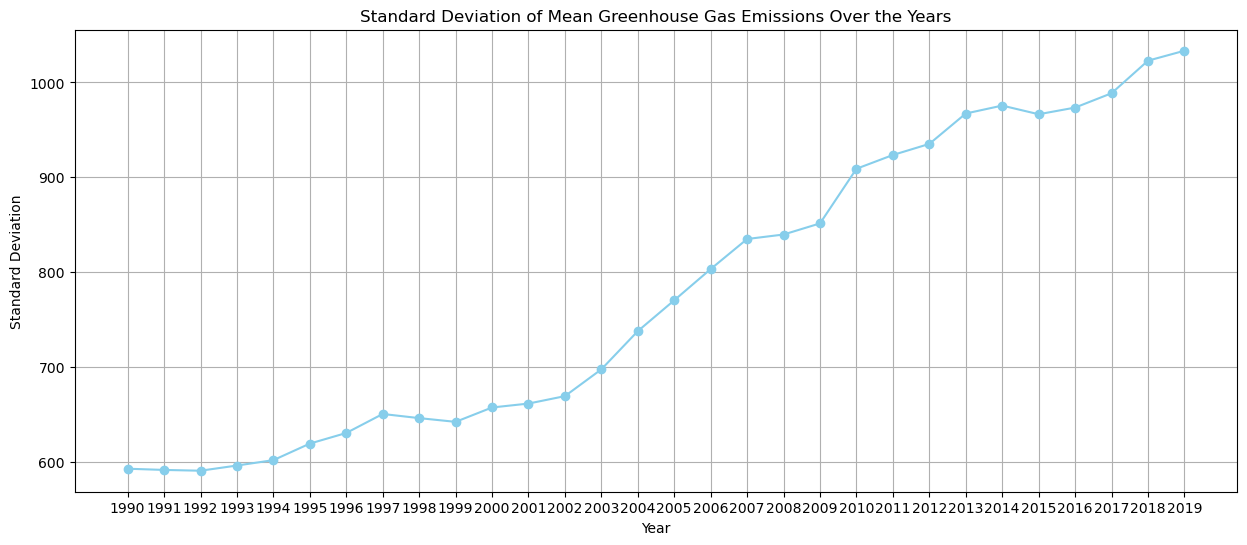

In [4]:
new_es1 = new_es.copy()
new_es1 = new_es.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit'])
columns_for_years = [str(year) for year in range(1990, 2020)]  
emission_data = new_es1[columns_for_years]
# Calculate the standard deviation for each year
std_per_year = emission_data.std()
# Plotting the standard deviation values
plt.figure(figsize=(15, 6))
plt.plot(years, std_per_year, color='skyblue', marker='o')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Mean Greenhouse Gas Emissions Over the Years')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [5]:
### emissions for different continents
new_emission = emission[emission['Country'] != 'World']
new_emission= new_emission.drop(columns=['Data source','Sector','Gas','Unit'])
continents = {
    "Asia": ["China", "India", "Indonesia", "Russia", "Japan", "Iran", "Saudi Arabia", "Türkiye", "Pakistan", 
             "Vietnam", "Thailand", "South Korea", "Malaysia", "Bangladesh", "Philippines", "Uzbekistan", 
             "Myanmar", "Iraq", "Kazakhstan", "United Arab Emirates", "Bangladesh", "North Korea", "Cambodia", 
             "Afghanistan", "Singapore", "Azerbaijan", "Georgia", "Armenia", "Brunei", "Tajikistan", "Kyrgyzstan"],
    "Africa": ["Democratic Republic of the Congo", "South Africa", "Nigeria", "Egypt", "Ethiopia", "Tanzania", 
               "Algeria", "Kenya", "Angola", "Sudan", "Libya", "Cameroon", "Zimbabwe", "Chad", "Mozambique", "Zambia",
               "Somalia", "Guinea", "Madagascar", "Republic of Congo", "Mali", "Niger", "Burkina Faso", 
               "Côte d'Ivoire", "Sierra Leone", "Liberia", "Guinea-Bissau", "Eswatini", "Comoros", "Mauritius", 
               "Djibouti", "Lesotho", "Gambia", "Namibia", "Botswana", "Malawi", "Eritrea", "Burundi", "Rwanda", 
               "Seychelles", "Cape Verde"],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Venezuela", "Colombia", "Peru", "Chile", "Ecuador", 
                      "Paraguay", "Bolivia", "Uruguay", "Guyana", "Suriname"],
    "Europe": ["European Union (27)", "Germany", "France", "Italy", "Spain", "Poland", "Netherlands", 
               "Belgium", "Czech Republic", "Greece", "Romania", "Portugal", "Hungary", "Sweden", "Austria", 
               "Switzerland", "Denmark", "Norway", "Finland", "Ireland", "United Kingdom", "Ukraine", "Belarus", 
               "Serbia", "Croatia", "Bulgaria", "Slovenia", "Lithuania", "Latvia", "Estonia", 
               "Bosnia and Herzegovina", "Kosovo", "North Macedonia", "Montenegro"],
    "Oceania":["Australia","New Zealand","Papua New Guinea","Fiji","Solomon Islands","Vanuatu","Samoa","Fiji",
               "Solomon Islands","Vanuatu","Samoa","Kiribati","Micronesia","Marshall Islands","Palau","Tonga",
               "Tuvalu","Nauru"]
}
country_to_continent = {country: continent for continent, countries in continents.items() for country in countries}
# Add a new 'Continent' column based on the mapping
new_emission['Continent'] = new_emission['Country'].map(country_to_continent)
#Calculate the mean of emissions for each continent
continent_emission_mean_1990 = new_emission.groupby('Continent')['1990'].mean().reset_index()
continent_emission_mean_1995 = new_emission.groupby('Continent')['1995'].mean().reset_index()
continent_emission_mean_2000 = new_emission.groupby('Continent')['2000'].mean().reset_index()
continent_emission_mean_2005 = new_emission.groupby('Continent')['2005'].mean().reset_index()
continent_emission_mean_2010 = new_emission.groupby('Continent')['2010'].mean().reset_index()
continent_emission_mean_2015 = new_emission.groupby('Continent')['2015'].mean().reset_index()
continent_emission_mean_2019 = new_emission.groupby('Continent')['2019'].mean().reset_index()
# Displaying the DataFrame with emission mean per continent
continent_emission = pd.merge(
    pd.merge(pd.merge(pd.merge(pd.merge(
        pd.merge(continent_emission_mean_1990, continent_emission_mean_1995, on='Continent'),
        continent_emission_mean_2000, on='Continent'
    ),
    continent_emission_mean_2005, on='Continent'
),
    continent_emission_mean_2010, on='Continent'
),
    continent_emission_mean_2015, on='Continent'
),
 continent_emission_mean_2019, on='Continent'
)
continent_emission

,Continent,1990,1995,2000,2005,2010,2015,2019
0,Africa,60.274250,66.080250,68.855500,77.358250,83.679500,93.636750,101.535500
1,Asia,395.898000,432.674000,456.023667,573.742667,715.224333,824.589667,899.646333
2,Europe,316.045937,287.112813,278.212500,281.081563,258.300625,216.806250,222.460625
3,North America,2150.173333,2282.530000,2547.796667,2625.600000,2524.910000,2396.123333,2405.376667
4,Oceania,44.962857,46.918571,54.022857,50.408571,50.447143,48.687143,56.692143
5,South America,247.461667,263.658333,278.660833,299.311667,317.400000,259.310833,255.722500


In [6]:
continent_emission_long = pd.melt(
    continent_emission, 
    id_vars=['Continent'], 
    var_name='Year', 
    value_name='Emission'
)
# Creating and displaying the line chart for each continent
line_chart = alt.Chart(continent_emission_long).mark_line(point=True).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')), 
    y=alt.Y('Emission:Q', axis=alt.Axis(title='Emissions (MtCO2e)')), 
    color='Continent:N' 
).properties(height= 300,width=400, title='Emissions Over Time by Continent')
line_chart

/opt/conda/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [7]:
continent_emission['Difference'] = continent_emission['2019'] - continent_emission['1990']
continent_emission=continent_emission.drop(columns=['1990','1995','2000','2005','2010','2015','2019'])
continent_emission

,Continent,Difference
0,Africa,41.261250
1,Asia,503.748333
2,Europe,-93.585312
3,North America,255.203333
4,Oceania,11.729286
5,South America,8.260833


In [8]:
minvalue=continent_emission['Difference'].min()
min_Continent = continent_emission.loc[continent_emission['Difference'] == minvalue]
min_Continent

,Continent,Difference
2,Europe,-93.585312


In [9]:
### clustering
emission_c = emission.drop(
    columns = ['Data source', 'Sector', 'Gas', 'Unit']
).set_index('Country').iloc[1:, :]

In [10]:
pca = sm.PCA(emission_c)
pca.scores.head()

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_20,comp_21,comp_22,comp_23,comp_24,comp_25,comp_26,comp_27,comp_28,comp_29
Country,,,,,,,,,,,,,,,,,,,,,
China,-0.619704,-0.731240,0.090104,-0.097508,0.112568,-0.153444,-0.102931,0.001479,-0.067215,0.036220,...,-0.000952,0.005245,0.000982,0.001186,0.001790,-0.008287,-0.009296,-0.006277,0.012861,0.012446
United States,-0.568068,0.430844,-0.364712,0.149490,-0.339425,-0.123725,-0.011645,0.292031,-0.191299,0.226876,...,0.024809,-0.022826,0.012273,-0.025227,-0.022766,-0.004391,-0.025494,-0.004258,-0.005178,0.018335
India,-0.167253,-0.141662,-0.078912,0.043241,-0.325610,0.637872,0.360819,-0.114314,0.301543,-0.068008,...,0.064511,0.095264,0.049714,-0.004135,-0.015968,-0.024908,-0.028059,0.068007,-0.102772,-0.053973
European Union (27),-0.352237,0.389473,0.135890,-0.225520,0.247645,0.072994,-0.110604,-0.594334,-0.148721,-0.190845,...,0.021477,0.041619,-0.002313,-0.045889,0.016808,-0.050518,-0.021840,0.003084,-0.025380,-0.023805
Indonesia,-0.119326,0.047095,0.157285,0.848253,0.447817,0.169866,0.009602,0.041546,-0.022803,-0.031445,...,0.001079,0.001038,-0.003011,0.000829,0.001887,0.002122,-0.006635,0.004636,-0.006788,0.007190


In [11]:
var_ratios = pca.eigenvals/pca.eigenvals.sum()
pca_var_explained = pd.DataFrame({
    'Component': np.arange(1, 31),
    'Proportion of variance explained': var_ratios
})
pca_var_explained['Cumulative variance explained'] = var_ratios.cumsum()

pca_var_explained.head()

,Component,Proportion of variance explained,Cumulative variance explained
0,1,0.936864,0.936864
1,2,0.059754,0.996618
2,3,0.002059,0.998678
3,4,0.000736,0.999413
4,5,0.000248,0.999661


In [12]:
base = alt.Chart(pca_var_explained).encode(x = 'Component')
prop_var_base = base.encode(
    y = alt.Y('Proportion of variance explained',
             axis = alt.Axis(titleColor = '#57A44C'))
)
cum_var_base = base.encode(
    y = alt.Y('Cumulative variance explained',
             axis = alt.Axis(titleColor = '#5276A7'))
)
prop_var = prop_var_base.mark_line(stroke = '#57A44C') + prop_var_base.mark_point(color = '#57A44C')
cum_var = cum_var_base.mark_line() + cum_var_base.mark_point()
var_explained_plot = alt.layer(prop_var, cum_var).resolve_scale(
    y = 'independent')
var_explained_plot

alt.LayerChart(...)

In [13]:
loading_df = pca.loadings.iloc[:, 0:3]
loading_df = loading_df.rename(columns = dict(zip(
    loading_df.columns, ['PC' + str(i) for i in range(1, 4)]
)))
loading_df.head()

,PC1,PC2,PC3
2019,-0.177823,-0.246342,0.145097
2018,-0.178907,-0.234727,0.113114
2017,-0.179450,-0.228171,0.100655
2016,-0.180102,-0.220396,0.089206
2015,-0.179268,-0.229688,0.087151


In [14]:
loading_plot_df = loading_df.reset_index().melt(
    id_vars = 'index',
    var_name = 'Principal Component',
    value_name = 'Loading'
).rename(columns = {'index':'Variable'})
loading_plot_df['zero'] = np.repeat(0, len(loading_plot_df))
base = alt.Chart(loading_plot_df)
loadings = base.mark_line(point = True).encode(
    y = alt.X('Variable', title = ''),
    x = 'Loading',
    color = 'Principal Component'
)
rule = base.mark_line().encode(x = alt.X('zero', title = 'Loading'), 
                              size = alt.value(0.05))
loading_plot = (loadings + rule).properties(width = 120)
loading_plot.facet(column = alt.Column('Principal Component', title = ''))

/opt/conda/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.FacetChart(...)

In [15]:
np.random.seed(1210)
clust = KMeans(n_clusters = 2)
clust.fit(emission_c)
clust_labels = clust.predict(emission_c)
plot_df = pca.scores.iloc[:, 0:2].copy()
plot_df['cluster'] = clust_labels
alt.Chart(plot_df).mark_circle(opacity = 0.5).encode(
    x = alt.X('comp_00:Q', title = 'PC1'),
    y = alt.Y('comp_01:Q', title = 'PC2'),
    color = 'cluster:N'
).configure_axis(
    labelFontSize = 14,
    titleFontSize = 16
).configure_legend(
    labelFontSize = 14,
    titleFontSize = 16)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


alt.Chart(...)